In [1]:
import tensorflow as tf

$ f(x)=W.x +b $

In [17]:
TRUE_W=3.0
TRUE_B=2.0
NUM_EXAMPLES=1000
x=tf.random.normal(shape=[NUM_EXAMPLES])

In [18]:
noise=tf.random.normal(shape=[NUM_EXAMPLES])

In [37]:
y=x*TRUE_W + TRUE_B +noise

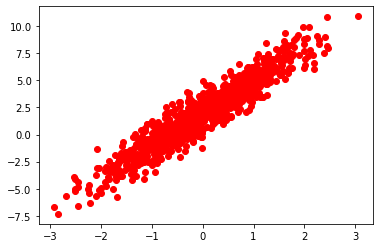

In [38]:
import matplotlib.pyplot as plt
plt.scatter(x,y,c="r")
plt.show()

In [21]:
#y=x*TRUE_W + TRUE_B 

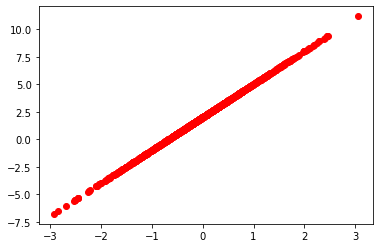

In [22]:
#plt.scatter(x,y,c="r")
#plt.show()

# Lets define the model

In [39]:
class MyModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w=tf.Variable(5.0)
        self.b=tf.Variable(0.0)
    def __call__(self,x):
        return self.w*x +self.b


In [40]:
model=MyModel()

In [41]:
model(3)

<tf.Tensor: shape=(), dtype=float32, numpy=15.0>

In [42]:
class Test:
    def __init__(self,x):
        self.x=x
    def __call__(self):
        return self.x**3

In [43]:
obj=Test(2)

In [44]:
obj

In [45]:
obj()

8

In [46]:
model=MyModel()

In [47]:
model(3)

<tf.Tensor: shape=(), dtype=float32, numpy=15.0>

In [48]:
model.w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>

In [49]:
model.b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [50]:
model.variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)

In [51]:
def MSE_loss(target_y, predicted_y):
    error=target_y-predicted_y
    squared_error=tf.square(error)
    mse=tf.reduce_mean(squared_error)
    return mse

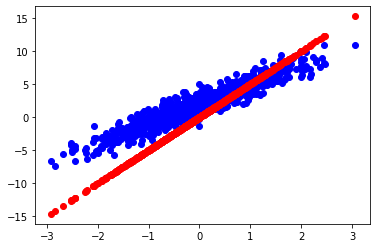

In [52]:
plt.scatter(x,y,c="b")
pred_y=model(x)# without train the model
plt.scatter(x, pred_y, c="r")
plt.show()

In [53]:
current_loss=MSE_loss(y, model(x))
current_loss.numpy()

9.163714

# Lets define our training

In [54]:
def train(model,x,y,learning_rate):
    with tf.GradientTape() as tape:
        current_loss=MSE_loss(y, model(x))
    dc_dw,dc_db=tape.gradient(current_loss,[model.w,model.b])
    model.w.assign_sub(learning_rate * dc_dw)
    model.b.assign_sub(learning_rate * dc_db)

In [69]:
model=MyModel()
Ws,bs=[],[]
epochs=25
learning_rate=0.1
w=model.w.numpy()
b=model.w.numpy()
init_loss=MSE_loss(y, model(x))
print(f"Initial W: {w}, initial bias: {b}, initial_loss: {init_loss}")

Initial W: 5.0, initial bias: 5.0, initial_loss: 9.163714408874512


In [70]:
for epoch in range(epochs):
    train(model,x,y,learning_rate)
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss=MSE_loss(y,model(x))
    print(f"For epoch: {epoch}, W: {Ws[-1]}, b: {bs[-1]}, current_loss: {current_loss}")

For epoch: 0, W: 4.61293888092041, b: 0.4191268980503082, current_loss: 6.232854843139648
For epoch: 1, W: 4.299434185028076, b: 0.7515870332717896, current_loss: 4.352369785308838
For epoch: 2, W: 4.0454559326171875, b: 1.0152536630630493, current_loss: 3.1452832221984863
For epoch: 3, W: 3.8396596908569336, b: 1.2243225574493408, current_loss: 2.370091199874878
For epoch: 4, W: 3.6728713512420654, b: 1.3900668621063232, current_loss: 1.8720238208770752
For epoch: 5, W: 3.5376698970794678, b: 1.5214378833770752, current_loss: 1.55185067653656
For epoch: 6, W: 3.428051471710205, b: 1.625542163848877, current_loss: 1.345927357673645
For epoch: 7, W: 3.3391575813293457, b: 1.7080209255218506, current_loss: 1.213414192199707
For epoch: 8, W: 3.2670557498931885, b: 1.7733514308929443, current_loss: 1.1280937194824219
For epoch: 9, W: 3.2085626125335693, b: 1.8250864744186401, current_loss: 1.0731276273727417
For epoch: 10, W: 3.161100149154663, b: 1.8660451173782349, current_loss: 1.037696

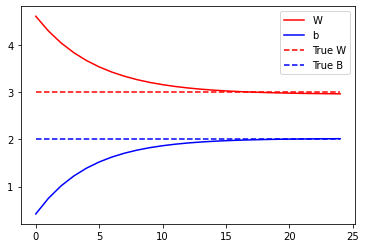

In [71]:
plt.plot(range(epochs), Ws, 'r', range(epochs), bs, "b")
plt.plot([TRUE_W]*epochs, "r--", [TRUE_B]*epochs, "b--")
plt.legend(["W","b","True W", "True B"])
plt.show()

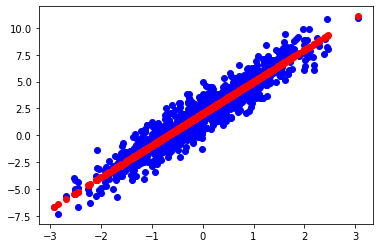

In [72]:
plt.scatter(x,y,c="b")
pred_y=model(x)# after train the model
plt.scatter(x, pred_y, c="r")
plt.show()